In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

np.set_printoptions(suppress = True)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [2]:
''' reading dataset '''
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [3]:
''' displaying first 5 rows '''
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
''' shape of dataset '''
df.shape

(12684, 26)

In [5]:
''' checking null values '''
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
''' calculating mean of each column that contain null values '''
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print("In {}, mean of null value is : {}".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))

In car, mean of null value is : 99.14853358561967
In Bar, mean of null value is : 0.8435824660990224
In CoffeeHouse, mean of null value is : 1.7108167770419427
In CarryAway, mean of null value is : 1.1904761904761905
In RestaurantLessThan20, mean of null value is : 1.0249132765689057
In Restaurant20To50, mean of null value is : 1.490066225165563


In [7]:
''' dropping car column, because that contains more than 99% of null values'''
df.drop(['car'], axis=1, inplace=True)

In [8]:
''' info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [12]:
df.expiration.unique()

array(['1d', '2h'], dtype=object)

In [13]:
''' preprocessing '''
label_enc = LabelEncoder()

df['destination'] = label_enc.fit_transform(df['destination'])
df['passanger'] = label_enc.fit_transform(df['passanger'])
df['weather'] = label_enc.fit_transform(df['weather'])
df['time'] = label_enc.fit_transform(df['time'])
df['coupon'] = label_enc.fit_transform(df['coupon'])
df['expiration'] = label_enc.fit_transform(df['expiration'])
df['gender'] = label_enc.fit_transform(df['gender'])
df['maritalStatus'] = label_enc.fit_transform(df['maritalStatus'])
df['education'] = label_enc.fit_transform(df['education'])
df['occupation'] = label_enc.fit_transform(df['occupation'])
df['Bar'] = label_enc.fit_transform(df['Bar'])
df['CoffeeHouse'] = label_enc.fit_transform(df['CoffeeHouse'])
df['CarryAway'] = label_enc.fit_transform(df['CarryAway'])
df['income'] = label_enc.fit_transform(df['income'])
df['Restaurant20To50'] = label_enc.fit_transform(df['Restaurant20To50'])
df['RestaurantLessThan20'] = label_enc.fit_transform(df['RestaurantLessThan20'])

In [14]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,21,3,1,5,24,3,4,4,5,1,0,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,21,3,1,5,24,3,4,4,5,1,0,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,21,3,1,5,24,3,4,4,5,1,0,1,1,0,0,1,1
3,1,1,2,80,2,2,1,0,21,3,1,5,24,3,4,4,5,1,0,1,1,0,0,1,0
4,1,1,2,80,2,2,0,0,21,3,1,5,24,3,4,4,5,1,0,1,1,0,0,1,0


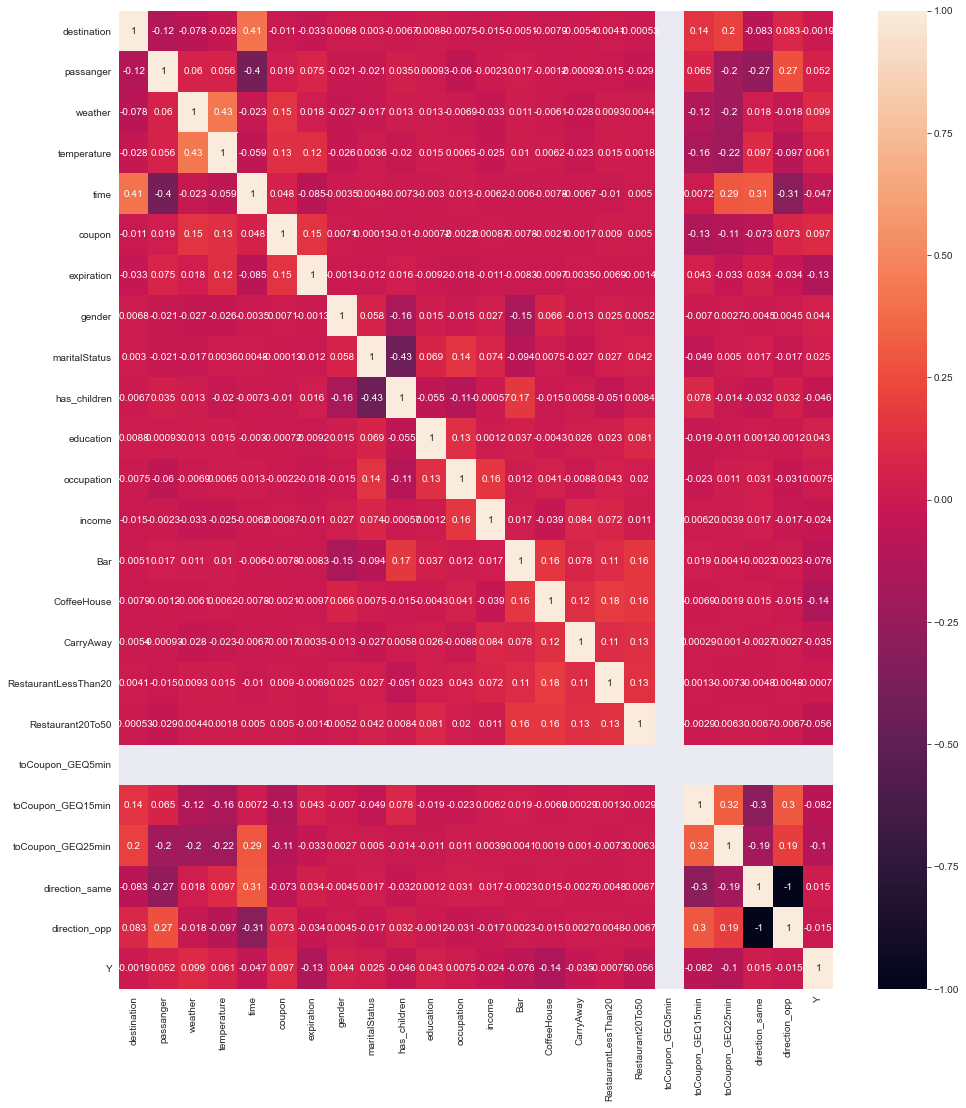

In [16]:
''' correlation '''
plt.figure(figsize = (16,18))
sns.heatmap(df.corr(),annot = True);

In [19]:
''' converting 50plus and below21 values into 51 and 20'''
df['age'] = np.where(df['age'] == '50plus', '51', df['age'])
df['age'] = np.where(df['age'] == 'below21', '20', df['age'])

In [20]:
''' count the number of values in Y column '''
df.Y.value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [21]:
''' independent and dependent features '''
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [25]:
''' train, test, evaluation function '''

def result(X, y, ts, rs, model, pca=False):
    
    ''' train test split '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
    
    ''' pca '''
    if pca == True:
        pca = PCA(n_components=8)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        
    ''' scaling '''
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    ''' fit on data '''
    model.fit(X_train, y_train)
    
    ''' prediction '''
    pred = model.predict(X_test)
    
    ''' performance of model '''
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()
    
    print("Accuracy Score: ", accuracy_score(y_test, pred))
    print("-" * 100)
    print()
    
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.45      0.51      1405
           1       0.64      0.77      0.70      1766

    accuracy                           0.63      3171
   macro avg       0.62      0.61      0.60      3171
weighted avg       0.62      0.63      0.62      3171

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6256701356039105
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


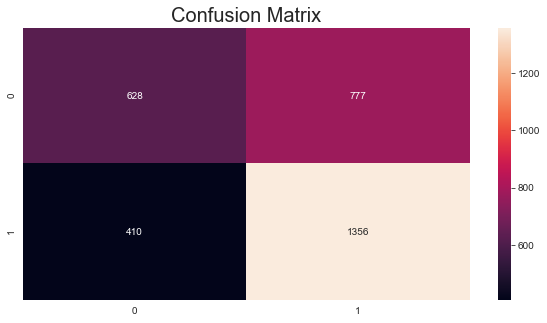

In [26]:
''' logistic regression '''
lg = LogisticRegression()
result(X, y, 0.25, 0, lg)

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      1405
           1       0.74      0.83      0.78      1766

    accuracy                           0.74      3171
   macro avg       0.74      0.73      0.73      3171
weighted avg       0.74      0.74      0.74      3171

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.738883632923368
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


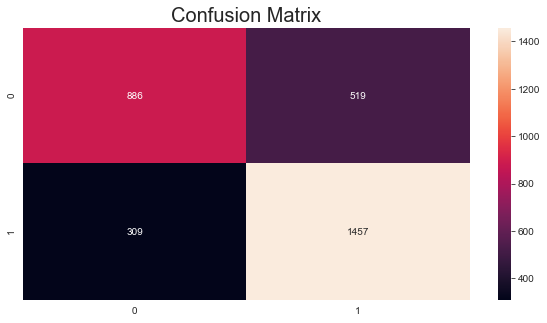

In [27]:
''' random forest classifier '''
rf = RandomForestClassifier()
result(X, y, 0.25, 0, rf)

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.37      0.45      1387
           1       0.61      0.78      0.69      1784

    accuracy                           0.60      3171
   macro avg       0.59      0.57      0.57      3171
weighted avg       0.59      0.60      0.58      3171

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6007568590350048
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


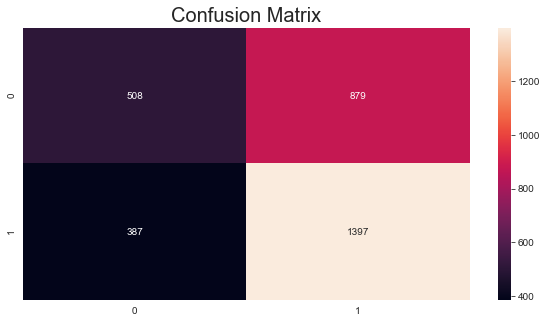

In [28]:
''' GaussionNB '''
nv = GaussianNB()
result(X, y, 0.25, 42, nv)

In [ ]:
''' knn '''
knn = KNeighborsClassifier()
result(X, y, 0.25, 0, knn)

In [24]:
''' SVC '''
svc = SVC()
result(X, y, 0.25, 0, svc)

NameError: name 'result' is not defined

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.54      0.57      1405
           1       0.66      0.72      0.69      1766

    accuracy                           0.64      3171
   macro avg       0.64      0.63      0.63      3171
weighted avg       0.64      0.64      0.64      3171

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.641753390097761
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


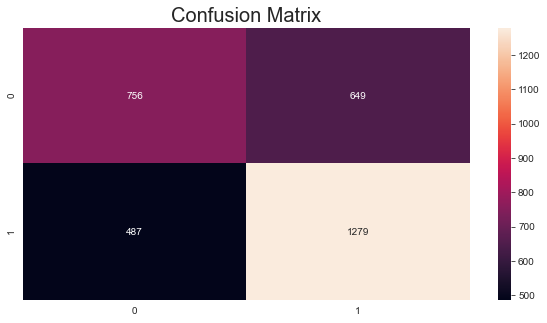

In [41]:
''' using pca with random forest classifier '''
rf = RandomForestClassifier()
result(X, y, 0.25, 0, rf, pca=True)